# Mushroom Classification Project

**Name:** David Rodriguez-Mayorquin
**Date:** March 22, 2025  

## Introduction
This project demonstrates the application of classification modeling techniques using a real-world dataset from the UCI Machine Learning Repository. The goal is to predict whether a mushroom is edible or poisonous based on its physical characteristics.

Classification models are commonly used in fields such as healthcare, finance, and business analytics to support decision-making. In this project, I will:
- Load and inspect the dataset
- Analyze feature distributions
- Encode features appropriately
- Train and evaluate multiple classification models
- Compare performance metrics and draw conclusions

The dataset contains 8124 mushroom samples described by 22 categorical attributes and a binary target variable.


## Section 1: Import and Inspect the Data
### 1.1 Load the dataset and display the first 10 rows

In [62]:
# Import libraries
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Plot settings
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Fetch the dataset directly from UCI
mushroom = fetch_ucirepo(id=73)  # Mushroom dataset

# Separate features and target
X = mushroom.data.features
y = mushroom.data.targets

# Combine X and y into one DataFrame for inspection
df = pd.concat([X, y], axis=1)

# Display first 10 rows
df.head(10)


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e
5,x,y,y,t,a,f,c,b,n,e,...,w,w,p,w,o,p,k,n,g,e
6,b,s,w,t,a,f,c,b,g,e,...,w,w,p,w,o,p,k,n,m,e
7,b,y,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,s,m,e
8,x,y,w,t,p,f,c,n,p,e,...,w,w,p,w,o,p,k,v,g,p
9,b,s,y,t,a,f,c,b,g,e,...,w,w,p,w,o,p,k,s,m,e


### 1.2 Check for Missing Values and Display Summary Statistics

In [63]:
# Check for missing values
print("Missing values per column:\n")
print(df.isnull().sum())

# Summary statistics for all columns (categorical-friendly)
df.describe(include='all')

Missing values per column:

cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
poisonous                      0
dtype: int64


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,...,9,9,1,4,3,5,9,6,7,2
top,x,y,n,f,n,f,c,b,b,t,...,w,w,p,w,o,p,w,v,d,e
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,...,4464,4384,8124,7924,7488,3968,2388,4040,3148,4208


## Reflection 1.

- The dataset is mostly clean, with no missing values in most columns
- The column `stalk-root` has 2,480 missing values. This will require handling before model training — either by imputing or dropping the column.
- All features are categorical and some features like odor, gill-size, ring-type, spore-print-color. etc., appear likely to be informative.

## Section 2: Data Exploration and Preparation
### 2.1 Explore Data Patterns and Distributions

In this section, I explore the distribution of categorical features to identify patterns, anomalies, and potential outliers. I also check for class imbalance in the target variable.


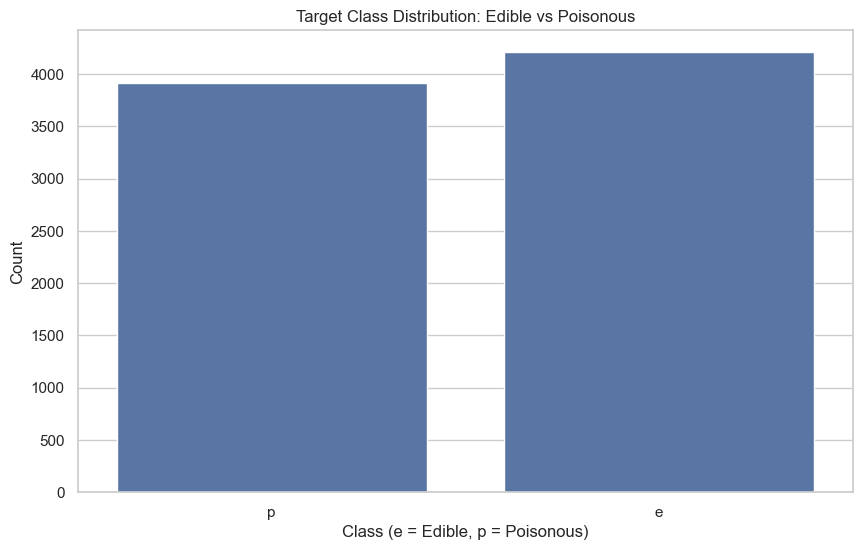

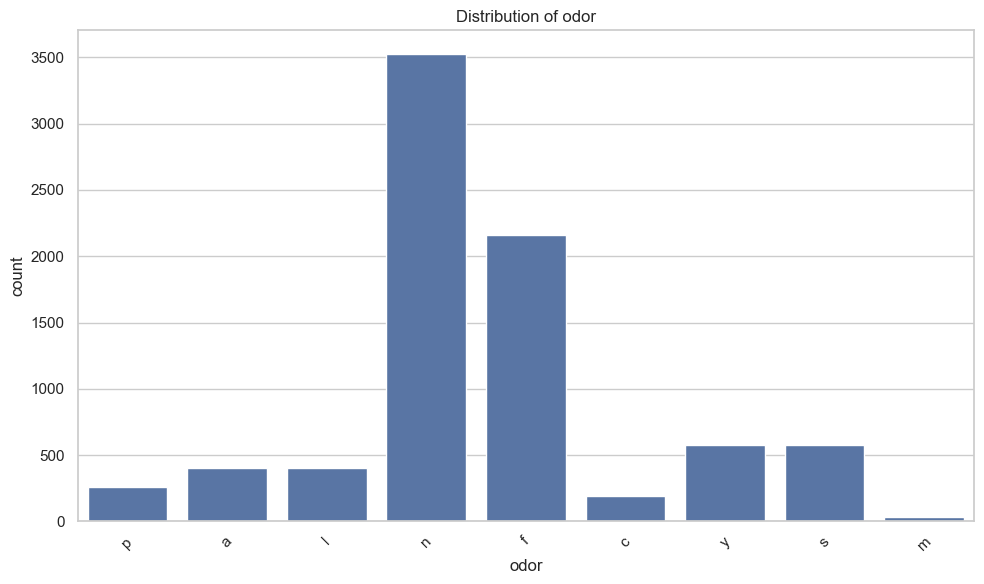

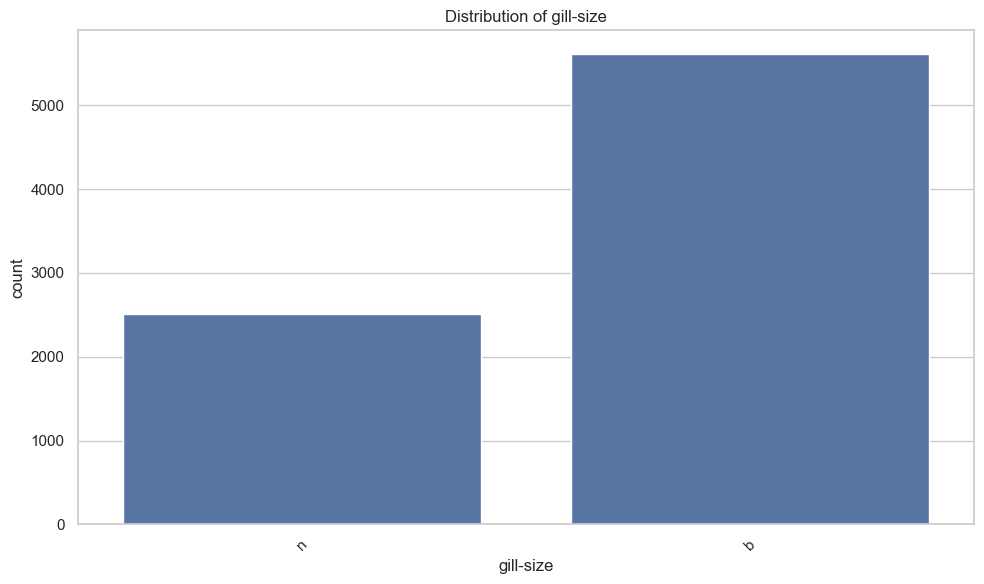

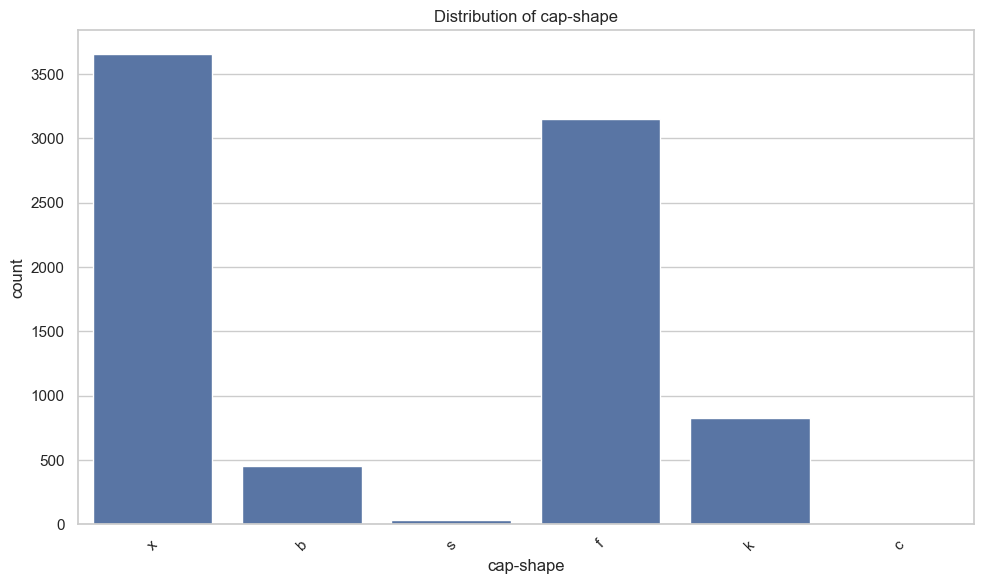

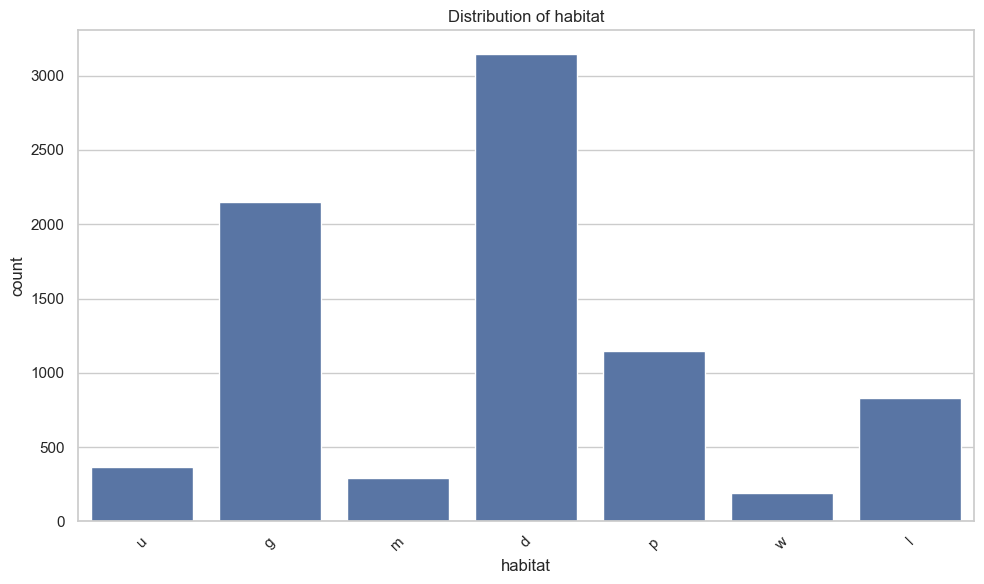

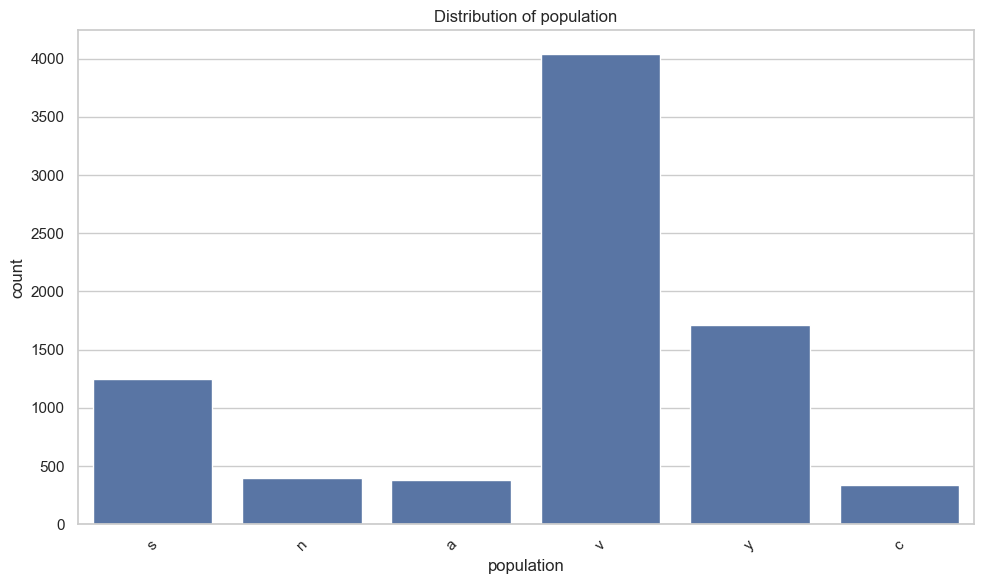

In [64]:
# Plot distribution of the target variable
sns.countplot(x='poisonous', data=df)
plt.title('Target Class Distribution: Edible vs Poisonous')
plt.xlabel('Class (e = Edible, p = Poisonous)')
plt.ylabel('Count')
plt.show()

# Check class counts numerically
df['poisonous'].value_counts()

# Plot count plots for selected categorical features
features_to_plot = ['odor', 'gill-size', 'cap-shape', 'habitat', 'population']

for feature in features_to_plot:
    sns.countplot(x=feature, data=df)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



### 2.2 Handle Missing Values and Clean Data

In this section, I handle missing values in the dataset and prepare the data for machine learning. This includes imputing or dropping missing data, addressing any outliers (if applicable), and converting categorical features into numerical format using encoding.

In [65]:
# Check again to confirm where missing values are
print("Missing values per column (before imputation):\n")
print(df.isnull().sum())

# Impute missing values in 'stalk-root' with a new category 'unknown'
df['stalk-root'] = df['stalk-root'].fillna('unknown')

# Confirm that missing values are handled
print("\nMissing values per column (after imputation):\n")
print(df.isnull().sum())

# Encode all categorical columns using LabelEncoder
label_encoder = LabelEncoder()

for col in df.columns:
    df[col] = label_encoder.fit_transform(df[col])

# Check transformed dataset
print("\nPreview of encoded dataset:\n")
print(df.head())

# Summary of final dataset
print("\nDataFrame Info (post-cleaning and encoding):\n")
print(df.info())

Missing values per column (before imputation):

cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
poisonous                      0
dtype: int64

Missing values per column (after imputation):

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor        

### 2.3 Feature Selection and Engineering

In this section, I consider whether additional feature engineering or transformations may improve model performance. This includes creating new features, combining or transforming existing ones, and applying scaling if necessary.


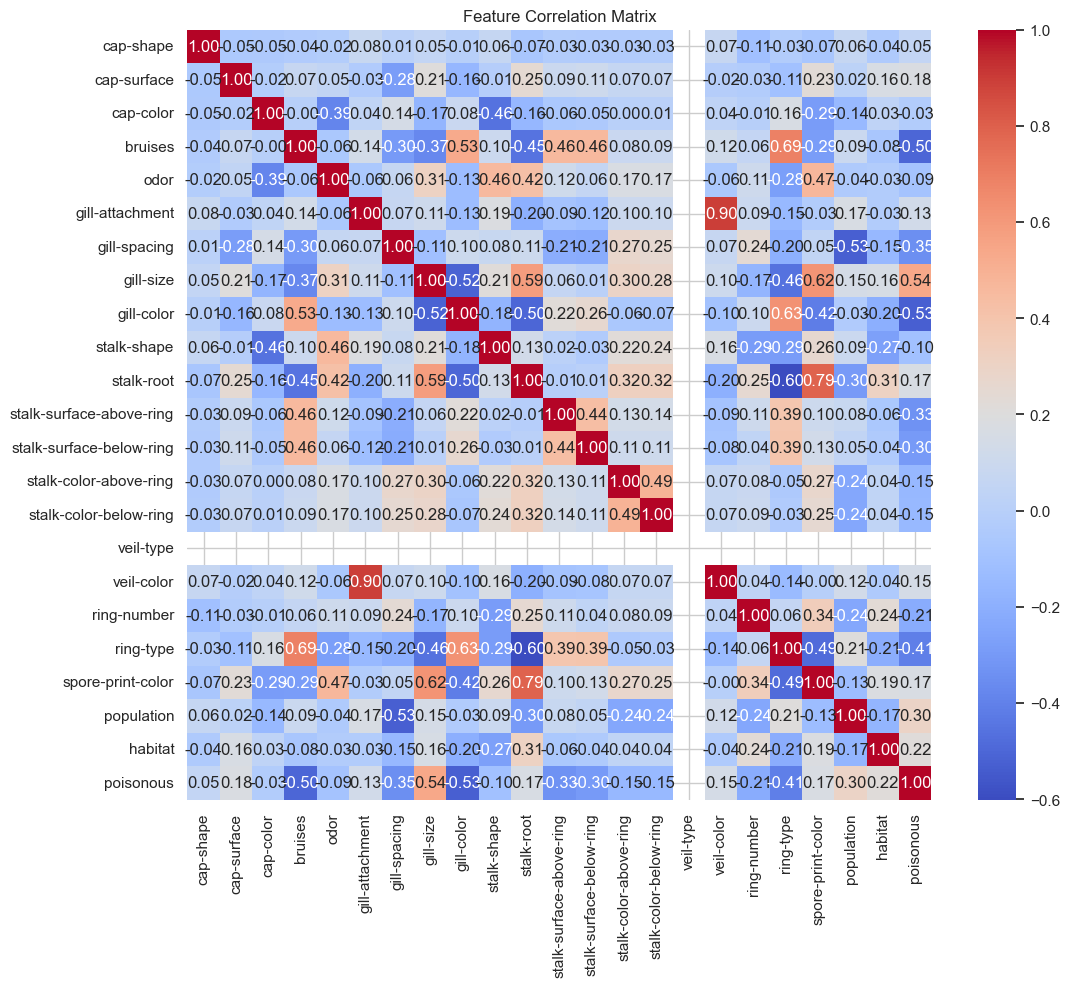

In [66]:
# Correlation Heatmap
# Check feature correlation with the target variable
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

In [67]:
# Show correlation of each feature with the target variable 'poisonous'
target_corr = df.corr()['poisonous'].drop('poisonous').sort_values(ascending=False)

print("Feature correlations with target (poisonous):\n")
print(target_corr)

Feature correlations with target (poisonous):

gill-size                   0.540024
population                  0.298686
habitat                     0.217179
cap-surface                 0.178446
spore-print-color           0.171961
stalk-root                  0.167975
veil-color                  0.145142
gill-attachment             0.129200
cap-shape                   0.052951
cap-color                  -0.031384
odor                       -0.093552
stalk-shape                -0.102019
stalk-color-below-ring     -0.146730
stalk-color-above-ring     -0.154003
ring-number                -0.214366
stalk-surface-below-ring   -0.298801
stalk-surface-above-ring   -0.334593
gill-spacing               -0.348387
ring-type                  -0.411771
bruises                    -0.501530
gill-color                 -0.530566
veil-type                        NaN
Name: poisonous, dtype: float64


In [68]:
# Feature Scaling
# Separate features and target again after encoding
X = df.drop(columns='poisonous')
y = df['poisonous']

# Apply StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled features back to DataFrame (optional)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Preview scaled features
X_scaled_df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1.029712,0.140128,-0.198250,1.185917,0.881938,0.162896,-0.438864,1.494683,-0.228998,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
1,1.029712,0.140128,1.765874,1.185917,-1.970316,0.162896,-0.438864,-0.669038,-0.228998,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.250471,-1.313108,-0.295730
2,-2.087047,0.140128,1.373049,1.185917,-0.544189,0.162896,-0.438864,-0.669038,0.053477,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.250471,-1.313108,0.867149
3,1.029712,0.953270,1.373049,1.185917,0.881938,0.162896,-0.438864,1.494683,0.053477,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
4,1.029712,0.140128,-0.591075,-0.843230,0.406562,0.162896,2.278612,-0.669038,-0.228998,0.873511,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,-1.272216,-0.250471,-2.910546,-0.295730


### Reflection 2:

- The class distribution of the target variable (`poisonous`) is relatively balanced.
- Some features, like odor, gill-size, and bruises, stood out in the count plots and also showed stronger correlations with the target variable.
- The correlation heatmap confirmed that several features have moderate relationships with each other and with the target, which may help drive model performance.
- The only missing data was in the `stalk-root` column, which was imputed with a new category (`unknown`).
- Categorical features were encoded using LabelEncoder, since all features were originally non-numeric.

## Section 3: Feature Selection and Justification

### 3.1 Choose Features and Target

In this project, the goal is to build a classification model to predict whether a mushroom is edible or poisonous based on its physical characteristics.

Target variable: `poisonous` – a binary variable indicating whether a mushroom is edible (`0`) or poisonous (`1`) after encoding.

**Selected input features:** To keep the project simple and easy to interpret, I selected only two features: `odor` and `gill-size`. These two attributes were chosen based on exploratory data analysis and correlation with the target variable.

Using a smaller set of features reduces model complexity and speeds up the overall workflow while still demonstrating the classification modeling process effectively.


### 3.2 Define X and y


In [69]:
# Define input features
X = X_scaled_df[['odor', 'gill-size']]
y = df['poisonous']

# Check shapes of X and y
print("X shape:", X.shape)
print("y shape:", y.shape)

# Preview first few rows
print("\nFirst few rows of X:")
print(X.head())

print("\nFirst few values of y:")
print(y.head())



X shape: (8124, 2)
y shape: (8124,)

First few rows of X:
       odor  gill-size
0  0.881938   1.494683
1 -1.970316  -0.669038
2 -0.544189  -0.669038
3  0.881938   1.494683
4  0.406562  -0.669038

First few values of y:
0    1
1    0
2    0
3    1
4    0
Name: poisonous, dtype: int64


### Reflection 3:

I selected `odor` and `gill-size` as my input features because they showed the strongest correlation with the target variable (`poisonous`). These two features provide a clear signal for classification while keeping the model simple and easy to interpret.

## Section 4: Train a Model

### 4.1 Split the Data into Training and Test Sets

The dataset is split into a training set and a test set using Scikit-Learn’s `train_test_split()` function. This ensures that the model is trained on one portion of the data and evaluated on a separate, unseen portion to assess performance.


In [70]:
from sklearn.model_selection import train_test_split

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  # stratify for balanced classes
)

# Check shape of the splits
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (6499, 2)
Test set shape: (1625, 2)


### 4.2 Train the Model

I chose a Decision Tree Classifier for its simplicity and interpretability. It works well with categorical data and is a good starting point for classification tasks.


In [71]:
# Train a Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### 4.3 Evaluate Model Performance

Model performance is evaluated using common classification metrics:  
- **Accuracy:** Overall correctness of predictions  
- **Precision:** How many predicted positives are true positives  
- **Recall:** How many actual positives are correctly predicted  
- **F1-Score:** Harmonic mean of precision and recall  
- **Confusion Matrix:** Shows true vs. predicted classifications


Classification Report:

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       842
           1       1.00      0.97      0.99       783

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625

Confusion Matrix:

[[842   0]
 [ 23 760]]
Accuracy Score: 0.9858461538461538


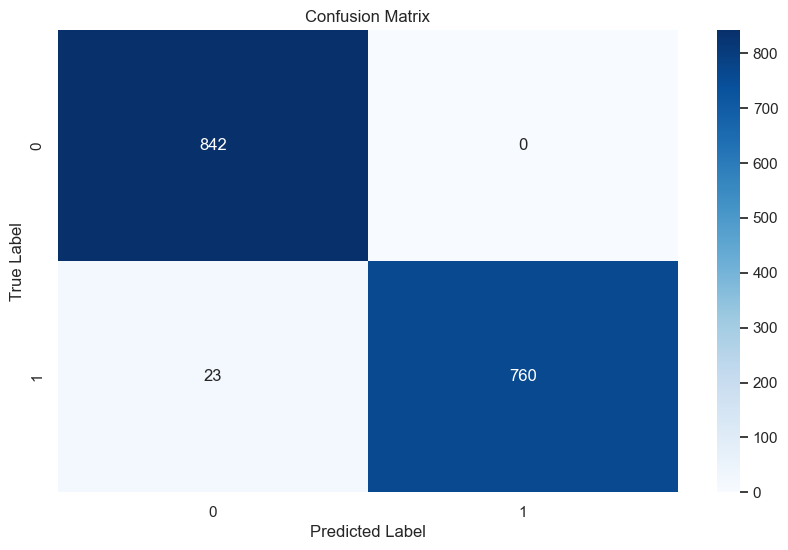

In [73]:
# Predict on test set
y_pred = model.predict(X_test)

# Evaluation metrics
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Plot Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Reflection 4:

The model did a very good job. It was able to correctly classify most mushrooms, even though I only used two features: `odor` and `gill-size`.

I was surprised that the model worked so well with just two features. The accuracy was almost 99%, which means it made very few mistakes. There were a few poisonous mushrooms that were predicted as edible, but overall the results were strong.

This shows that even a simple model can work well when the right features are used.
